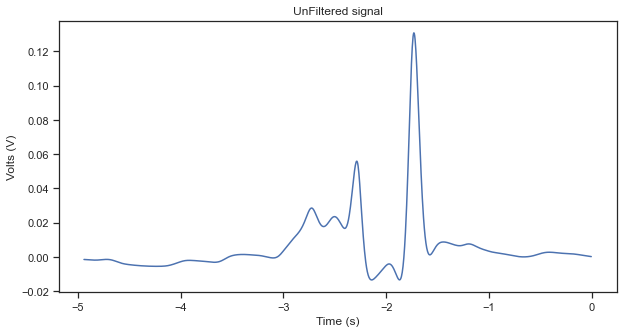

In [99]:
from scipy.signal import filtfilt
from scipy import stats
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from src.format_csv import csv_format
import scipy
import seaborn as sns
sns.set(style='ticks')


plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 18})

scope_num = 1
lab_num = 2
filename = f'data/Lab_{lab_num}/Raw/scope_{scope_num}.csv'
csv_format(filename)

df = pd.read_csv(filename)

sensor_data = df[['channel_2']]

sensor_data = np.array(sensor_data)
time = np.array(df['x_axis'])

plt.plot(time, sensor_data)
plt.xlabel('Time (s)')
plt.ylabel('Volts (V)')
plt.title('UnFiltered signal')
plt.show()

In [96]:

def band_pass_filter(signal):

    # Sampling Rate of data
    fs = len(signal) / 5

    # Range for filter
    lowcut = 0.01 # Tends to control how 'flat' the ends are
    highcut = 5 # Tends to control how much the graph resembles the original graph (higher = closer to original)

    nyq = 0.5*fs
    low = lowcut/nyq
    high = highcut/nyq

    order=2

    b,a = scipy.signal.butter(order,[low,high], 'bandpass', analog=False)
    y = scipy.signal.filtfilt(b,a,signal,axis=0)

    return y

<ipython-input-97-5f92139641c9>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(time, sensor_data, color='c', LineWidth=2, label="Unfiltered Signal")
<ipython-input-97-5f92139641c9>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(time, filtered_signal, color='k', LineWidth=2, label="Filtered Signal")


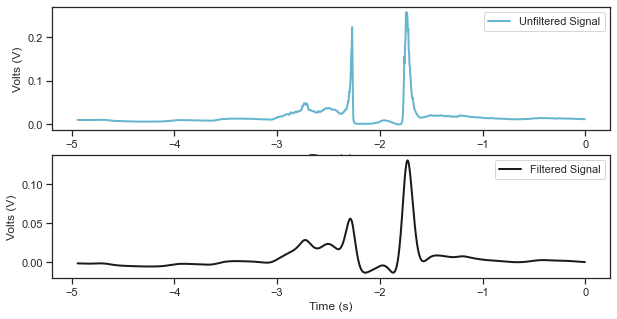

In [97]:

fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(time, sensor_data, color='c', LineWidth=2, label="Unfiltered Signal")
plt.xlabel('Time (s)')
plt.ylabel('Volts (V)')
plt.legend()

plt.sca(axs[1])
filtered_signal = band_pass_filter(sensor_data)
plt.plot(time, filtered_signal, color='k', LineWidth=2, label="Filtered Signal")
plt.xlabel('Time (s)')
plt.ylabel('Volts (V)')
plt.legend()

# filtered_df = pd.DataFrame(time.tolist(), filtered_signal.tolist(), columns=['x_axis', 'channel_2'])
# filtered_df.to_csv(f'data/Lab_{lab_num}/Filtered/scope_{scope_num}.csv')

# save raw scope as png in data/Plots/Lab_<lab_num>/Spectrograms
image_path = f'data/Plots/Lab_{lab_num}/Bandpass_filtered_plots/scope_{scope_num}.png'
plt.savefig(image_path, dpi=300, bbox_inches='tight', transparent=False)

In [98]:

t=time.tolist()
f =filtered_signal.tolist()
f=sum(f,[])
df = pd.DataFrame(list(zip(*[t,f])))
df.columns=['x_axis', 'channel_2']
df.to_csv(f'data/Lab_{lab_num}/Filtered/scope_{scope_num}.csv', index=False)

print(df)


        x_axis  channel_2
0    -4.941406  -0.001472
1    -4.937500  -0.001488
2    -4.933594  -0.001504
3    -4.929688  -0.001521
4    -4.925781  -0.001538
...        ...        ...
1260 -0.019531   0.000344
1261 -0.015625   0.000309
1262 -0.011719   0.000274
1263 -0.007813   0.000241
1264 -0.003906   0.000209

[1265 rows x 2 columns]


             0                         1
0    -4.941406  [-0.0014716121244540447]
1    -4.937500  [-0.0014879347140414724]
2    -4.933594   [-0.001504476976485417]
3    -4.929688  [-0.0015211971843693203]
4    -4.925781  [-0.0015380494433077268]
...        ...                       ...
1260 -0.019531   [0.0003444351711388642]
1261 -0.015625   [0.0003088823921241697]
1262 -0.011719   [0.0002742218701197125]
1263 -0.007813  [0.00024071771154998654]
1264 -0.003906  [0.00020864160094890836]

[1265 rows x 2 columns]
